**IMPORTS**

In [109]:
# OTHER #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# SKLEARN #
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier




**DATA PIPELINE CLASS**

In [110]:

data = pd.read_csv(r"..\data\student_portuguese_clean.csv")

#Pipeline class has methods that can prepare the data for further use

class Pipeline:
    
    def __init__(self, data, prediction_column):
        self.data = data
        self.prediction_column = prediction_column
    def getX(self):
        return self.data.drop(self.prediction_column, axis=1).to_numpy()
    def getData(self):
        return self.data
    def getY(self):
        return self.data[self.prediction_column].to_numpy()
    def getNumericalColumns(self):
        return self.data.select_dtypes(include=['float64', 'int64']).columns
    def getCorrelationMatrix(self):
        correlation_matrix = self.data[self.getNumericalColumns()].corr()
        
        plt.figure(figsize=(8, 8))
        sns.heatmap(correlation_matrix,
                    annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Numerical Columns')
        plt.show()
    def getDummies(self):
        #Represent non-numerical features numerically
        numerical_columns = self.getNumericalColumns()
        non_numerical_columns = self.data.columns.difference(numerical_columns)
    
        return pd.get_dummies(self.data, columns=non_numerical_columns, drop_first=True)
    def getCorrelationList(self):
        return self.getDummies().corr()["final_grade"].sort_values(ascending=False)
    

    



**X AND Y**

In [111]:
pipeline = Pipeline(data.drop("student_id", axis=1), "final_grade")

dummies = pipeline.getDummies()

X = dummies.drop("final_grade", axis = 1)
y = dummies["final_grade"]

#Standardizing input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0, shuffle=True)

   age  class_failures  free_time  weekday_alcohol  weekend_alcohol  grade_1  \
0   18               0          3                1                1        0   
1   17               0          3                1                1        9   
2   15               0          3                2                3       12   
3   15               0          2                1                1       14   
4   16               0          3                1                2       11   

   grade_2  final_grade  address_type_Urban  \
0       11           11                   1   
1       11           11                   1   
2       13           12                   1   
3       14           14                   1   
4       13           13                   1   

   father_education_higher education  ...  \
0                                  1  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4          

**LINEAR REGRESSION MODEL**


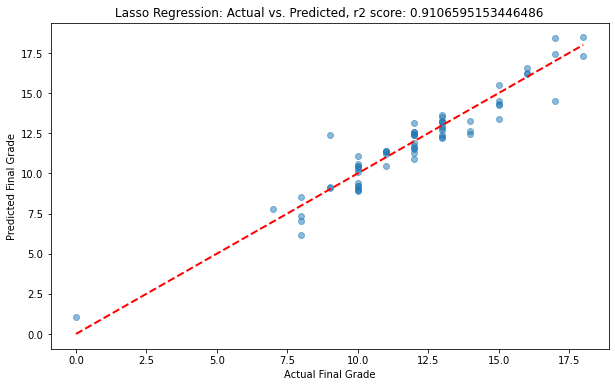

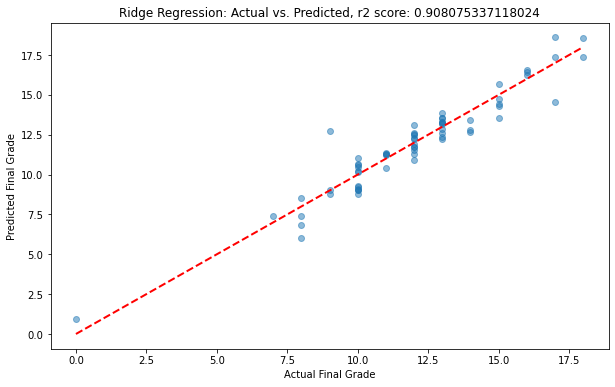

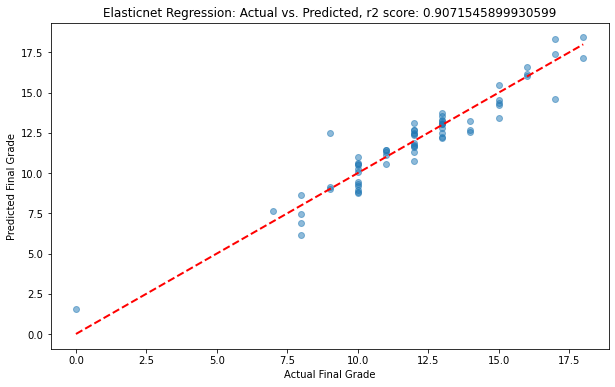

In [112]:



#Defining the models and fitting them to the training data
lassoCV = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
elasticnetCV = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)
ridgeCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

#Making predictions
ypred_lasso = lassoCV.predict(X_test)
ypred_elasticnet = elasticnetCV.predict(X_test)
ypred_ridge = ridgeCV.predict(X_test)

#Getting the r2 score
r2_lasso = metrics.r2_score(y_test, ypred_lasso)
r2_elasticnet = metrics.r2_score(y_test, ypred_elasticnet)
r2_ridge = metrics.r2_score(y_test, ypred_ridge)

#A simple scatter plot of ytest and ypred, a good model should follow a diagonal line y=x
def makeScatter(ytest, ypred, r2score, modelname):
    plt.figure(figsize=(10, 6))
    plt.scatter(ytest, ypred, alpha=0.5)
    plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', linewidth=2)  # Diagonal line
    plt.title(f'{modelname} Regression: Actual vs. Predicted, r2 score: {r2score}')
    plt.xlabel('Actual Final Grade')
    plt.ylabel('Predicted Final Grade')
    plt.show()

makeScatter(y_test,ypred_lasso, r2_lasso, "Lasso")
makeScatter(y_test,ypred_ridge, r2_ridge, "Ridge")
makeScatter(y_test,ypred_elasticnet, r2_elasticnet, "Elasticnet")


**MODEL #2**


In [117]:
from sklearn.model_selection import cross_val_score


# Create a DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
# Perform cross-validation and get the scores
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean score
mean_score = cv_scores.mean()
print("Mean cross-validation score:", mean_score)








c:\Users\Oleas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.4017094  0.2991453  0.37606838 0.4017094  0.31896552]
Mean cross-validation score: 0.3595195991747716


InvocationException: GraphViz's executables not found

**MODEL #3**

**MODEL #4**